<a href="https://colab.research.google.com/github/mannmoshe/machine-learning/blob/main/FinalProject/ConstructionPlans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Construction plans<br>*By Moshe Mann*

**Overview**<br>
The Israel Planning Administration (IPA) is handling detailed construction plans.<BR>Every detailed plan contains a lot of data, among the rest, division of main and service area.<BR><BR>Main area is the area that divided among the tenants, like the departments,<BR> and the service area is common to all tenants, like parking, stairwell etc.<BR><BR>
In the near future the plans will not include the division between main and service area, because it is not important for the IPA as planning unit, but still, it is important data for regulation.<BR><BR> The purpose of the project is to predict the main and service areas based on the cell and plan features, so that the model can be used for regulatory purposes.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mannmoshe/machine-learning/main/FinalProject/cellsData.csv')

In [3]:
data.shape

(13709, 27)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13709 entries, 0 to 13708
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PL_NUMBER                13709 non-null  object 
 1   PL_AREA                  13709 non-null  object 
 2   LANDUSE                  13709 non-null  object 
 3   MAIN_ABOVE               13709 non-null  float64
 4   SERVICE_ABOVE            13709 non-null  float64
 5   MAIN_UNDER               13709 non-null  float64
 6   SERVICE_UNDER            13709 non-null  float64
 7   CELL_SIZE_TOTAL          13709 non-null  float64
 8   CELL_SIZE_MIN            13709 non-null  float64
 9   CELL_SIZE_MAX            13709 non-null  float64
 10  COVERED_AREA             13709 non-null  float64
 11  HOUSING_UNITS            13709 non-null  float64
 12  BUILDING_HEIGHT          13709 non-null  float64
 13  FLOORS_NUM               13709 non-null  float64
 14  TOTAL_ABOVE           

# Add description of each column.

In [5]:
data.head()

,PL_NUMBER,PL_AREA,LANDUSE,MAIN_ABOVE,SERVICE_ABOVE,MAIN_UNDER,SERVICE_UNDER,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,COVERED_AREA,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_ABOVE,PL_NAME,PL_INSTITUTION,AUTHORITY,DISTRICT,SECTOR_GROUP,AREA,SECTOR,POPULATION,MUNICIPAL_AREA_STATUS,CONFIRMATION_YEAR,CONSTRUCTION_TYPE_GROUP,CELL_SIZE
0,610-0197038,610-0197038-102,מגורים,975.0,300.0,1075.0,300.0,2466.0,0.0,0.0,1109.70,16.0,11.0,2.0,1275.0,הגדלת זכויות בניה מתחם מגורים ברחוב אירוסים 27...,דרום,מחוזית,דרום,חברה כללית / מעורבת,ערד,חברה כללית / מעורבת,26756,עירייה,2017,חדשה,2466.0
1,610-0197038,610-0197038-101,מגורים,975.0,300.0,1075.0,300.0,2025.0,0.0,0.0,911.25,16.0,11.0,2.0,1275.0,הגדלת זכויות בניה מתחם מגורים ברחוב אירוסים 27...,דרום,מחוזית,דרום,חברה כללית / מעורבת,ערד,חברה כללית / מעורבת,26756,עירייה,2017,חדשה,2025.0
2,151-0392894,151-0392894-210,מגורים,960.0,180.0,0.0,0.0,2820.0,0.0,0.0,604.00,6.0,17.0,4.0,1140.0,קיבוץ צובה,ירושלים,מחוזית,ירושלים,חברה כללית / מעורבת,מטה יהודה,חברה כללית / מעורבת,625,"מועצה מקומית,מועצה אזורית,עירייה",2017,התחדשות,2820.0
3,151-0392894,151-0392894-22,מגורים,4800.0,960.0,0.0,0.0,15410.0,0.0,0.0,3122.00,30.0,17.0,4.0,5760.0,קיבוץ צובה,ירושלים,מחוזית,ירושלים,חברה כללית / מעורבת,מטה יהודה,חברה כללית / מעורבת,625,"מועצה מקומית,מועצה אזורית,עירייה",2017,התחדשות,15410.0
4,151-0392894,151-0392894-10,מגורים,640.0,120.0,0.0,0.0,1600.0,0.0,0.0,360.00,4.0,17.0,4.0,760.0,קיבוץ צובה,ירושלים,מחוזית,ירושלים,חברה כללית / מעורבת,מטה יהודה,חברה כללית / מעורבת,625,"מועצה מקומית,מועצה אזורית,עירייה",2017,התחדשות,1600.0


In [6]:
data['PL_NUMBER'].str.contains('תמל').sum()

5147

In [7]:
data['IS_TAMAL'] = data['PL_NUMBER'].apply(lambda x: 1 if 'תמל' in x else 0)
data['IS_TAMAL'].value_counts()

0    8562
1    5147
Name: IS_TAMAL, dtype: int64

In [8]:
data['LANDUSE'].value_counts()

מגורים                                13344
מגורים ומסחר                            154
מגורים מסחר ותעסוקה                      81
מגורים מסחר ותיירות                      74
מגורים ותיירות                           19
מגורים ומבנים ומוסדות ציבור              10
מגורים מסחר ומבנים ומוסדות ציבור          6
מגורים תעסוקה ותיירות                     6
מגורים ודיור מיוחד                        3
מגורים ומשרדים                            2
מגורים מסחר ותחבורה                       2
מגורים ותעסוקה                            2
תתתת מגורים ב                             2
מגורים תעסוקה ומבנים ומוסדות ציבור        1
מגורים ואירוח כפרי                        1
מגורים תיירות ומבנים ומוסדות ציבור        1
מגורים ותחבורה                            1
Name: LANDUSE, dtype: int64

In [9]:
data['LANDUSE'] = data['LANDUSE'].mask(data['LANDUSE'] != 'מגורים', 'מגורים משולב')

In [10]:
data['LANDUSE'].value_counts()

מגורים          13344
מגורים משולב      365
Name: LANDUSE, dtype: int64

Now let's explore the Main & Service columns.

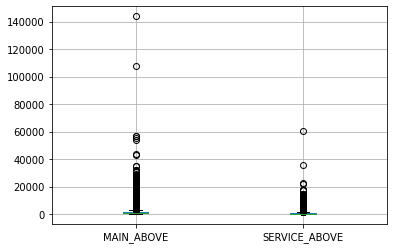

In [11]:
data[["MAIN_ABOVE","SERVICE_ABOVE"]].boxplot()

The outliers are probably mistakes. let's see the distribution:

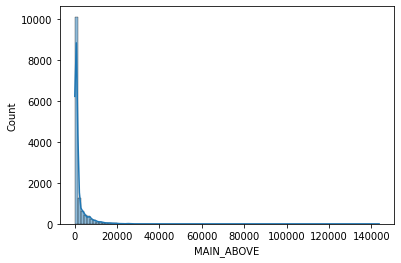

In [12]:
sns.histplot(data=data, x="MAIN_ABOVE", bins=100, kde=True)

In [13]:
data.iloc[:, 3].describe(percentiles=np.arange(0.05, 1, .05))

count     13709.000000
mean       1945.182818
std        3787.593473
min           0.000000
5%          190.000000
10%         220.000000
15%         280.000000
20%         320.000000
25%         391.400000
30%         449.472000
35%         512.992000
40%         574.560000
45%         621.000000
50%         696.300000
55%         767.000000
60%         850.000000
65%         982.000000
70%        1197.840000
75%        1539.000000
80%        2150.000000
85%        3515.600000
90%        5348.800000
95%        8580.000000
max      143759.249400
Name: MAIN_ABOVE, dtype: float64

In [14]:
filter_main_above = data['MAIN_ABOVE'] <= 8580
filtered_data = data.loc[filter_main_above]

Let's explore how many rows we have now, and the main and service data.

In [15]:
print("Remaining rows:", filtered_data.shape[0], filtered_data.shape[0]/data.shape[0])

Remaining rows: 13024 0.9500328251513604


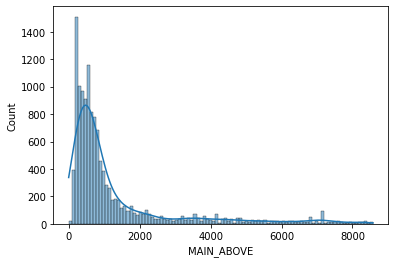

In [16]:
sns.histplot(data=filtered_data, x="MAIN_ABOVE", bins=100, kde=True)

Let's do the same for the Service column.

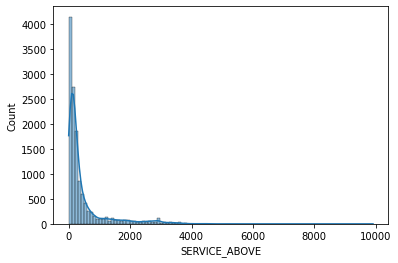

In [17]:
sns.histplot(data=filtered_data, x="SERVICE_ABOVE", bins=100, kde=True)

In [18]:
filtered_data.iloc[:, 4].describe(percentiles=np.arange(0.05, 1, .05))

count    13024.000000
mean       453.399652
std        732.652339
min          0.000000
5%          40.000000
10%         50.000000
15%         60.000000
20%         70.000000
25%         80.000000
30%         92.535000
35%        111.000000
40%        124.000000
45%        155.000000
50%        182.900000
55%        201.000000
60%        235.000000
65%        270.000000
70%        320.764000
75%        425.000000
80%        550.000000
85%        760.000000
90%       1300.000000
95%       2220.000000
max       9910.000000
Name: SERVICE_ABOVE, dtype: float64

In [19]:
filter_service_above = filtered_data['SERVICE_ABOVE'] <= 2220
filtered_data = filtered_data.loc[filter_service_above]

In [20]:
print("Remaining rows:", filtered_data.shape[0], filtered_data.shape[0]/data.shape[0])

Remaining rows: 12373 0.9025457728499526


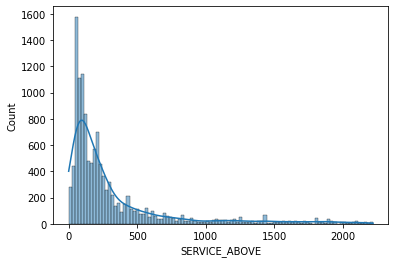

In [21]:
sns.histplot(data=filtered_data, x="SERVICE_ABOVE", bins=100, kde=True)

The determining entrance is 0th floor.
<BR>
Above/Under at the columns names refers to the determining entrance.<BR>
As part of the project I will try to predict only the above areas.<BR> The under areas are not relevant for now, so I will ignore them. 

Those columns ['CELL_SIZE_TOTAL', 'CELL_SIZE_MIN',
       'CELL_SIZE_MAX'] describe the cell size.

In [22]:
filtered_data[['CELL_SIZE_TOTAL', 'CELL_SIZE_MIN', 'CELL_SIZE_MAX']].describe()

,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX
count,12373.000000,12373.000000,12373.000000
mean,915.024729,204.636008,15.372518
std,1735.648840,687.801227,185.583836
min,0.000000,0.000000,0.000000
25%,329.000000,0.000000,0.000000
50%,575.000000,0.000000,0.000000
75%,998.000000,0.000000,0.000000
max,63924.000000,32000.000000,5575.000000


In [23]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12373 entries, 0 to 13708
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PL_NUMBER                12373 non-null  object 
 1   PL_AREA                  12373 non-null  object 
 2   LANDUSE                  12373 non-null  object 
 3   MAIN_ABOVE               12373 non-null  float64
 4   SERVICE_ABOVE            12373 non-null  float64
 5   MAIN_UNDER               12373 non-null  float64
 6   SERVICE_UNDER            12373 non-null  float64
 7   CELL_SIZE_TOTAL          12373 non-null  float64
 8   CELL_SIZE_MIN            12373 non-null  float64
 9   CELL_SIZE_MAX            12373 non-null  float64
 10  COVERED_AREA             12373 non-null  float64
 11  HOUSING_UNITS            12373 non-null  float64
 12  BUILDING_HEIGHT          12373 non-null  float64
 13  FLOORS_NUM               12373 non-null  float64
 14  TOTAL_ABOVE           

Let's handle null values:

In [32]:
filtered_data.isnull().sum()

PL_NUMBER                    0
PL_AREA                      0
LANDUSE                      0
MAIN_ABOVE                   0
SERVICE_ABOVE                0
MAIN_UNDER                   0
SERVICE_UNDER                0
CELL_SIZE_TOTAL              0
CELL_SIZE_MIN                0
CELL_SIZE_MAX                0
COVERED_AREA                 0
HOUSING_UNITS                0
BUILDING_HEIGHT              0
FLOORS_NUM                   0
TOTAL_ABOVE                  0
PL_NAME                      0
PL_INSTITUTION               0
AUTHORITY                    0
DISTRICT                     0
SECTOR_GROUP                 0
AREA                       156
SECTOR                       0
POPULATION                   0
MUNICIPAL_AREA_STATUS      156
CONFIRMATION_YEAR            0
CONSTRUCTION_TYPE_GROUP      5
CELL_SIZE                    0
IS_TAMAL                     0
dtype: int64

In [33]:
filtered_data['AREA'].value_counts()

עירון         865
ירושלים       799
קסם           541
שפלת הגליל    510
טירה          509
             ... 
חולון           1
אזור            1
כפר יונה        1
אופקים          1
אלעד            1
Name: AREA, Length: 125, dtype: int64

In [34]:
filtered_data['MUNICIPAL_AREA_STATUS'].value_counts()

עירייה                               3707
מועצה  מקומית,עירייה                 3082
מועצה  מקומית,מועצה אזורית,עירייה    2535
מועצה  מקומית                        1702
מועצה אזורית,עירייה                   638
מועצה  מקומית,מועצה אזורית            441
מועצה אזורית                          112
Name: MUNICIPAL_AREA_STATUS, dtype: int64

In [36]:
filtered_data['CONSTRUCTION_TYPE_GROUP'].value_counts(dropna=False)

חדשה       9412
התחדשות    1593
הסדרה      1363
NaN           5
Name: CONSTRUCTION_TYPE_GROUP, dtype: int64

In [38]:
filtered_data['CONSTRUCTION_TYPE_GROUP'] = filtered_data['CONSTRUCTION_TYPE_GROUP'].fillna(filtered_data['CONSTRUCTION_TYPE_GROUP'].mode().iloc[0])
filtered_data['CONSTRUCTION_TYPE_GROUP'].value_counts(dropna=False)

חדשה       9417
התחדשות    1593
הסדרה      1363
Name: CONSTRUCTION_TYPE_GROUP, dtype: int64